In [ ]:
Assignment 5
Name: Jason Sandoval 
Dataset: Heart Disease in Cleveland and Hungary
Data: October eight 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

#setting up the datasets
plt.style.use('default')

print("libraries loaded succefully")

libraries loaded succefully


In [5]:
# === Load and prepare Cleveland dataset ===
cols = [
    "age","sex","cp","trestbps","chol","fbs","restecg",
    "thalach","exang","oldpeak","slope","ca","thal","num"
]

# Load datasets with missing values converted to NaN
df_cleveland = pd.read_csv("processed.cleveland.data", header=None, names=cols, na_values="?")
df_hungary = pd.read_csv("processed.hungarian.data", header=None, names=cols, na_values="?")

# Add binary target: 0 = no disease, 1 = disease present (1–4)
df_cleveland["target"] = (df_cleveland["num"] > 0).astype(int)
df_hungary["target"] = (df_hungary["num"] > 0).astype(int)

# Add source labels to differentiate datasets
df_cleveland["source"] = "Cleveland"
df_hungary["source"] = "Hungary"

# Combine both into one DataFrame
df_combined = pd.concat([df_cleveland, df_hungary], ignore_index=True)

In [6]:
# Check for missing values
print("Missing values before cleaning:")
print(df_combined.isna().sum())

# Fill missing values (median for numeric, mode for categorical)
df_combined["ca"].fillna(df_combined["ca"].median(), inplace=True)
df_combined["thal"].fillna(df_combined["thal"].mode()[0], inplace=True)

print("\nMissing values after cleaning:")
print(df_combined.isna().sum())


Missing values before cleaning:
age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          295
thal        268
num           0
target        0
source        0
dtype: int64

Missing values after cleaning:
age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca            0
thal          0
num           0
target        0
source        0
dtype: int64


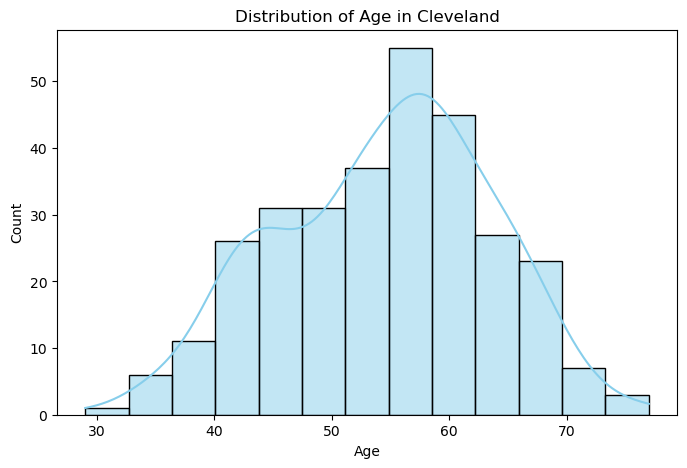

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df_cleveland['age'], kde=True, color='skyblue')
plt.title("Distribution of Age in Cleveland")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

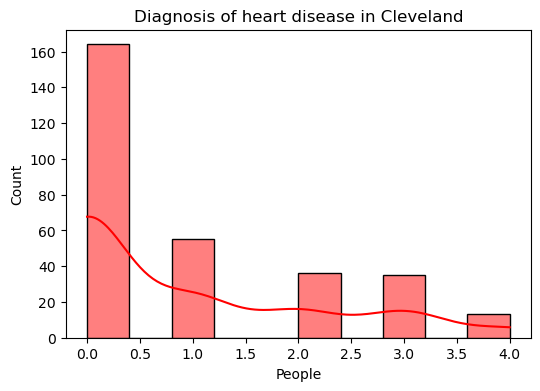

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(df_cleveland['num'], kde=True, color='red')
plt.title("Diagnosis of heart disease in Cleveland")
plt.xlabel("People")
plt.ylabel("Count")
plt.show()

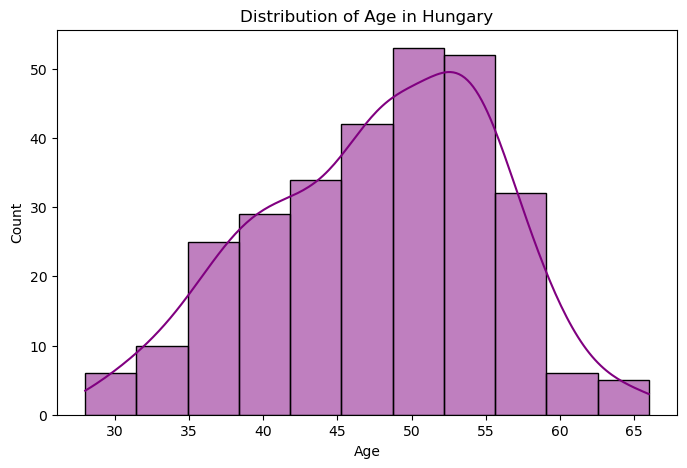

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df_hungary['age'], kde=True, color='purple')
plt.title("Distribution of Age in Hungary")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

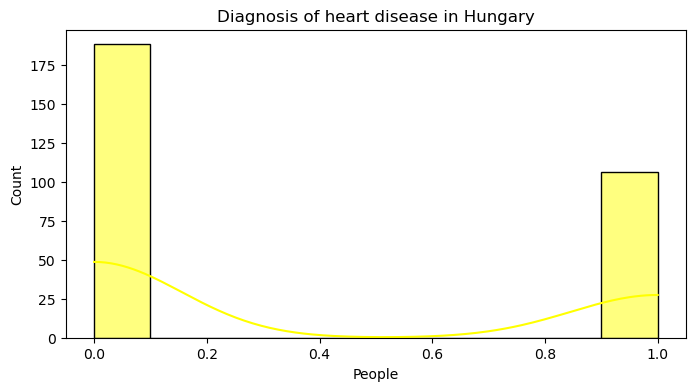

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(df_hungary['num'], kde=True, color='yellow')
plt.title("Diagnosis of heart disease in Hungary")
plt.xlabel("People")
plt.ylabel("Count")
plt.show()

<h2>My hypothesis and analysis<h2/>

<h3>Hypothesis 1: Hungary is healthier<h3/>

<ul>
    <li>Null Hypotheis: My null hypothesis is that I belive Hungary has a better health care system and the people there take better care of themselves compared to the people in America.</li>
    <li>Alternative Hypothesis: The new hypothesis shows that people in Cleveland have an average of lower cholesterol level compared to people in Hungary where it is higher.</li>
        <li>Rationale: From what the graph shows we can see that people in Hungary are more healthier
    Underneath we can see the graph show how the there are more people in Hungary that have higher cholesterol level compared to people in Cleveland The graph is able to show the average and the standard deviation and it is greater for Hungary but there are more outliers in Hungary.</li>
</ul>

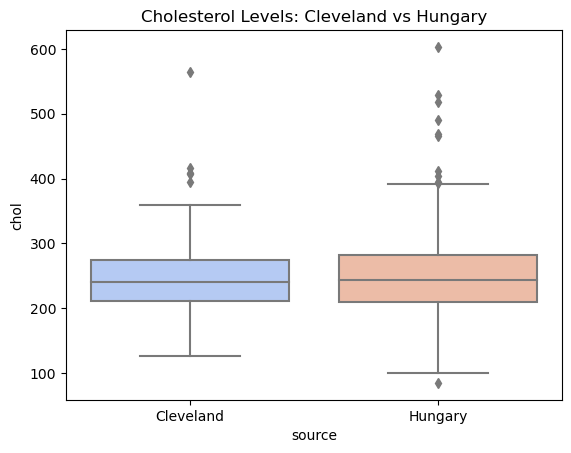

In [14]:
sns.boxplot(data=df_combined, x="source", y="chol", palette="coolwarm")
plt.title("Cholesterol Levels: Cleveland vs Hungary")
plt.show()

<h2>Hypotheis 2: Hungary has lower heart disease </li>

<ul>
    <li>Null: I believe that Hungary would have lower heart disease. Due to the fact that they don't have as much perservatives, corn oil, and other harmful substances compared to America where red40 and other chemicals are in food </li>
    <li>Alternate Hypothesis: Hungary actually overall has higher heart disease. </li>
    <li>Rationale: From seeing the graphs we can see that Hungary has a higher count of people with higher cholestorerol levels. There is an overall big difference. We can see that the average for Cleveland is smaller but also the standard deviation is a lot smaller.</li>
</ul>

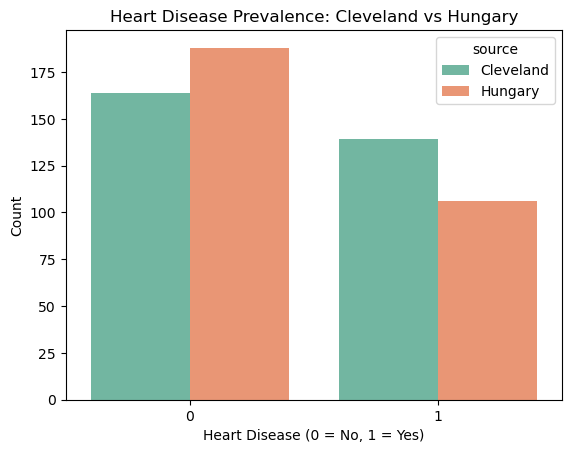


Proportion of Heart Disease Cases:
target            0         1
source                       
Cleveland  0.541254  0.458746
Hungary    0.639456  0.360544

Chi-square test p-value: 0.0185
✅ The difference in heart disease prevalence is statistically significant.


In [16]:
# === Compare heart disease prevalence between Cleveland and Hungary ===
sns.countplot(data=df_combined, x="target", hue="source", palette="Set2")
plt.title("Heart Disease Prevalence: Cleveland vs Hungary")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Show proportions
print("\nProportion of Heart Disease Cases:")
print(df_combined.groupby("source")["target"].value_counts(normalize=True).unstack())

# Perform a chi-square test to check if difference is significant
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df_combined["source"], df_combined["target"])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"\nChi-square test p-value: {p:.4f}")

if p < 0.05:
    print("✅ The difference in heart disease prevalence is statistically significant.")
else:
    print("❌ The difference is not statistically significant.")


<h1>Summary</h1>


The overall experience was really fun because I am a cs major but I have done a small but of data science work when I was orignially an engineering major. But with the overall data that was accumulated and the cleaning of the data I was surprised with the results that I got. With lots of Europeans boasting about how they have free and accesible healthcare and Europe being more healthier with certain restrictions of seed oils and other persvatives. But with the data we can see that Celeveland was able to surprise me with the data that I was able to find. Looking at the graphs and the different data pulled I was surprised. I would have defeinetly loved to see a difference with the heart disease because for the data in cleveland there was stages of heart disease and with the data from Hungary it was either you have heart disease or you don't. Some limitations that I had is that since I don't have that much background with data analysis I was unaware of the full potential the different libraries provided. But I was able to use AI to help me with debugging my code and showing me things from the library that I didn't know about. 

I would like to do analysis with the different parts as well because I was able to see data from another state in the US and another country I would like to compare in a deomestic but also internationally as to how the overall health of people is. 